In [22]:
import http.client
import requests
import datetime
import pandas as pd

In [23]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
import seaborn as sns
sns.set_context('talk')
sns.set_style("darkgrid")

In [24]:

lat=51.2299
lon=0.1463
with open('weathermap.appid') as f: appid=f.read()

reqmap = {
    'lat' : lat,
    'lon' : lon,
    'appid' : appid,
    'units' : 'metric'
}


url = 'https://api.openweathermap.org/data/2.5/onecall'
response = requests.get(url, reqmap)

print(response.status_code)
print(response.headers)
print(response.text[:100])


200
{'Server': 'openresty', 'Date': 'Tue, 30 Mar 2021 19:10:17 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Content-Length': '18958', 'Connection': 'keep-alive', 'X-Cache-Key': '/data/2.5/onecall?lat=51.23&lon=0.15&units=metric', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Credentials': 'true', 'Access-Control-Allow-Methods': 'GET, POST'}
{"lat":51.2299,"lon":0.1463,"timezone":"Europe/London","timezone_offset":3600,"current":{"dt":161713


In [25]:
daily=pd.json_normalize(response.json()["daily"])
daily.index = daily.dt.apply(datetime.datetime.utcfromtimestamp)

In [26]:
daily

,dt,sunrise,sunset,pressure,humidity,dew_point,wind_speed,wind_deg,weather,clouds,...,temp.max,temp.night,temp.eve,temp.morn,feels_like.day,feels_like.night,feels_like.eve,feels_like.morn,snow,rain
dt,,,,,,,,,,,,,,,,,,,,,
2021-03-30 12:00:00,1617105600,1617082749,1617128895,1028,58,9.67,3.98,159,"[{'id': 800, 'main': 'Clear', 'description': '...",0,...,18.73,10.75,13.84,7.02,15.30,8.89,12.48,4.51,NaN,NaN
2021-03-31 12:00:00,1617192000,1617169013,1617215394,1021,60,10.80,4.29,205,"[{'id': 802, 'main': 'Clouds', 'description': ...",47,...,18.91,11.05,13.95,9.73,16.02,9.95,12.70,7.90,NaN,NaN
2021-04-01 12:00:00,1617278400,1617255278,1617301892,1025,72,7.97,7.35,54,"[{'id': 802, 'main': 'Clouds', 'description': ...",27,...,13.00,4.31,7.30,9.47,7.41,-2.31,1.17,5.88,NaN,NaN
2021-04-02 12:00:00,1617364800,1617341542,1617388391,1029,57,1.86,6.30,41,"[{'id': 801, 'main': 'Clouds', 'description': ...",24,...,11.54,4.94,8.02,2.04,3.95,-0.67,1.88,-3.18,NaN,NaN
2021-04-03 12:00:00,1617451200,1617427808,1617474890,1032,56,2.23,5.89,40,"[{'id': 802, 'main': 'Clouds', 'description': ...",29,...,11.20,3.58,7.00,3.39,4.70,0.91,3.25,-2.00,NaN,NaN
2021-04-04 12:00:00,1617537600,1617514073,1617561388,1024,47,1.57,3.58,253,"[{'id': 800, 'main': 'Clear', 'description': '...",2,...,13.79,4.78,9.22,1.45,8.19,0.92,4.66,-1.42,NaN,NaN
2021-04-05 12:00:00,1617624000,1617600339,1617647887,1006,83,-0.02,6.15,7,"[{'id': 601, 'main': 'Snow', 'description': 's...",100,...,5.21,0.70,2.44,5.21,-3.76,-3.66,-2.50,1.39,4.71,NaN
2021-04-06 12:00:00,1617710400,1617686605,1617734386,1012,56,-1.76,5.30,333,"[{'id': 500, 'main': 'Rain', 'description': 'l...",32,...,6.29,1.31,5.05,-1.38,0.34,-2.01,2.14,-6.63,NaN,0.34


<AxesSubplot:xlabel='dt'>

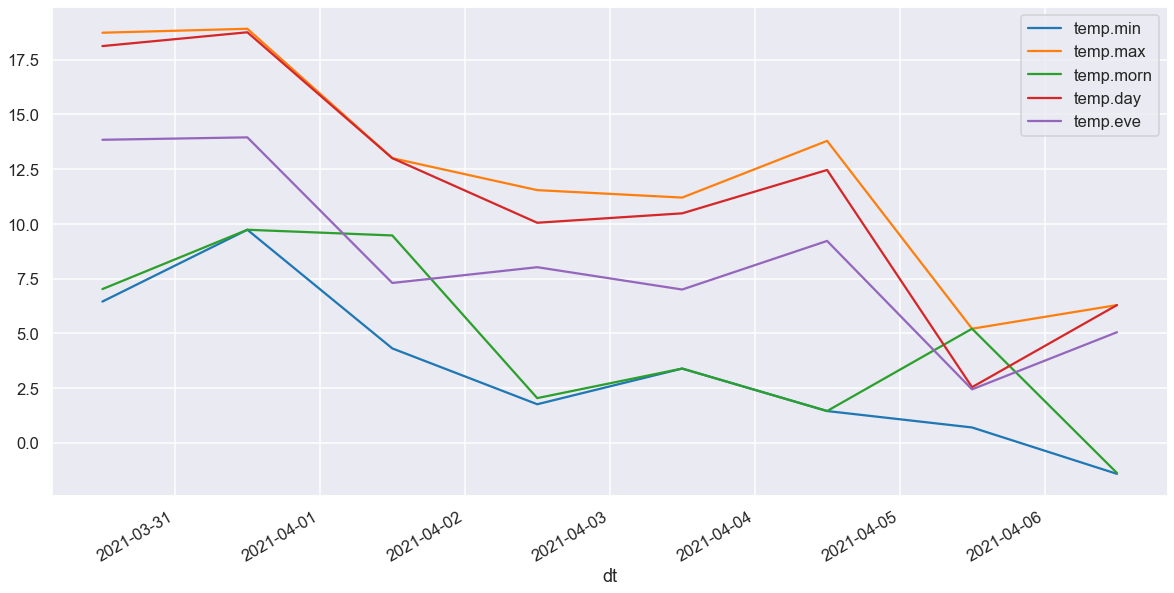

In [27]:
daily[["temp.min", "temp.max", "temp.morn", "temp.day", "temp.eve"]].plot()